# Основы распределения и статистики

Используя тестовые данные (или ваши собственные), рассчитайте 5 метрик.  
Для каждой метрики:  

Посчитайте среднее  
Посчитайте медиану  
Посчитайте 95-персентиль  
Визуализируйте распределение частотным графиком и “ящиком с усами”. Есть ли распределения, напоминающие нормальное?   
Со звездочкой: проверьте это с помощью теста на нормальность    
Для АБ тестов, задействующих конверсии, рассчитайте необходимые размеры выборок  

Date - датасессии  
●User_id - id пользователя  
●Hour - час стартасессии  
●App_opened - приложение открыто  
●Price_seen - пользователь ввел данные маршрута и показана цена  
●Order_made - пользователь кликнул по кнопке заказа  
●Surge - в этот период был включен surge (надбавка к стоимости поездки в период повышенного спроса)  
●Ride_completed - поездка успешно завершена  
●User_cancelled - пользователь отменил поездку  
●Age - возраст пользователя  
●Os - операционная система на телефоне  
●City_center_order - заказ был сделан из центра города  
●Order_class - класс поездки  
●Distance - дистанция в км  
●Rfm - rfm-сегмент пользователя

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
#import scipy.stats as st

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
df = pd.read_csv('Netology_A_B-testing_HW_1.csv')
df.head()

,Unnamed: 0,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm
0,0,2020-05-21,867689,12,1,1,1,no surge,1,0,20,iOS,0,business,7.982135,low
1,1,2020-05-23,752172,5,1,1,1,no surge,1,0,37,Android,1,economy,2.908468,high
2,2,2020-05-20,486559,15,1,1,1,no surge,1,0,47,Android,0,comfort,7.224614,low
3,3,2020-05-19,304024,0,1,1,1,no surge,1,0,59,Android,1,economy,1.874349,low
4,4,2020-05-23,139420,0,1,1,1,no surge,1,0,19,Android,0,business,10.704778,medium


In [4]:
df.describe()

,Unnamed: 0,user_id,hour,app_opened,price_seen,order_made,ride_completed,user_cancelled,age,city_center_order,distance
count,101500.000000,101500.000000,101500.000000,101500.0,101500.000000,101500.000000,101500.000000,101500.000000,101500.000000,101500.000000,91431.000000
mean,50749.500000,549874.802207,11.481429,1.0,0.900798,0.731389,0.620365,0.111025,40.471764,0.571675,5.371152
std,29300.670499,258600.104176,6.917522,0.0,0.298934,0.443239,0.485299,0.314164,13.536322,0.494838,4.118531
min,0.000000,100093.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.010946
25%,25374.750000,328223.000000,5.000000,1.0,1.000000,0.000000,0.000000,0.000000,29.000000,0.000000,2.438335
50%,50749.500000,548827.000000,11.000000,1.0,1.000000,1.000000,1.000000,0.000000,40.000000,1.000000,4.279565
75%,76124.250000,773051.000000,17.000000,1.0,1.000000,1.000000,1.000000,0.000000,52.000000,1.000000,7.129814
max,101499.000000,999978.000000,23.000000,1.0,1.000000,1.000000,1.000000,1.000000,69.000000,1.000000,40.268966


**Посчитайте среднее**

In [5]:
print('средний возраст:', round(df['age'].mean(), 2))
print('среднее расстояние:', round(df['distance'].mean(), 2))
print('среднее время:', round(df['hour'].mean(), 2))

средний возраст: 40.47
среднее расстояние: 5.37
среднее время: 11.48


**Посчитайте медиану**

In [6]:
print('медианный возраст:', round(df['age'].median(), 2))
print('смедианное расстояние:', round(df['distance'].median(), 2))
print('смедианное время:', round(df['hour'].median(), 2))

медианный возраст: 40.0
смедианное расстояние: 4.28
смедианное время: 11.0


**Посчитайте 95-персентиль**

In [7]:
print('95-персентиль возраст:', round(df['age'].quantile(0.95), 2))
print('95-персентиль расстояние:', round(df['distance'].quantile(0.95), 2))
print('95-персентиль время:', round(df['hour'].quantile(0.95), 2))

95-персентиль возраст: 63.0
95-персентиль расстояние: 13.69
95-персентиль время: 22.0


**Визуализируйте распределение частотным графиком и “ящиком с усами”.**

Возраст

Statistics=0.967, p-value=0.000
Тест Шапиро: Отклонить гипотезу о нормальности
Statistics=28787.917, p-value=0.000
критерий Пирсона: Отклонить гипотезу о нормальности


C:\Users\trufanovdv\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


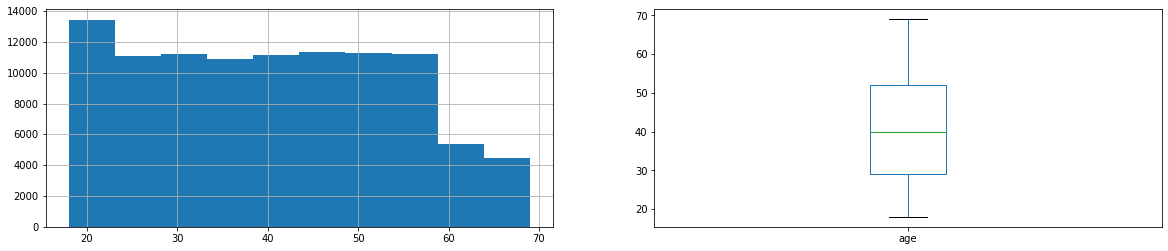

In [7]:
fig, axs = plt.subplots(1,2, figsize=(20, 4))

df['age'].hist(ax=axs[0])
df['age'].plot(kind='box', ax=axs[1])

stat, p = scipy.stats.shapiro(df['age']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Тест Шапиро: Принять гипотезу о нормальности')
else:
    print('Тест Шапиро: Отклонить гипотезу о нормальности')
    
stat, p = scipy.stats.normaltest(df['age']) # Критерий согласия Пирсона
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('критерий Пирсона: Принять гипотезу о нормальности')
else:
    print('критерий Пирсона: Отклонить гипотезу о нормальности')

Расстояние

Statistics=0.867, p-value=0.000
Тест Шапиро: Отклонить гипотезу о нормальности
Statistics=28398.018, p-value=0.000
критерий Пирсона: Отклонить гипотезу о нормальности


C:\Users\trufanovdv\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


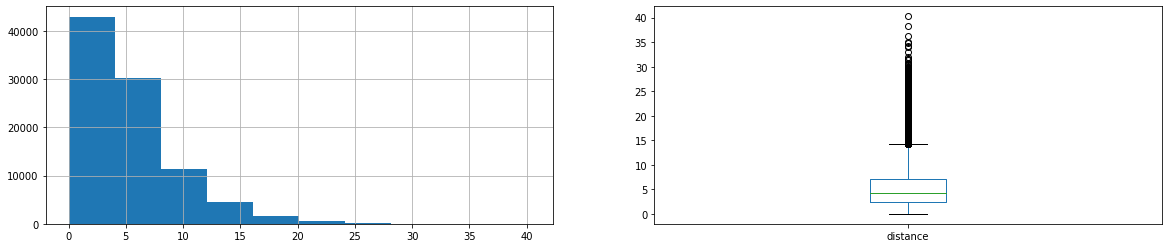

In [8]:
distance = df['distance'].dropna()

fig, axs = plt.subplots(1,2, figsize=(20, 4))

distance.hist(ax=axs[0])
distance.plot(kind='box', ax=axs[1])

stat, p = scipy.stats.shapiro(distance) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Тест Шапиро: Принять гипотезу о нормальности')
else:
    print('Тест Шапиро: Отклонить гипотезу о нормальности')
    
stat, p = scipy.stats.normaltest(distance) # Критерий согласия Пирсона
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('критерий Пирсона: Принять гипотезу о нормальности')
else:
    print('критерий Пирсона: Отклонить гипотезу о нормальности')

Час входа в приложение

C:\Users\trufanovdv\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=0.951, p-value=0.000
Тест Шапиро: Отклонить гипотезу о нормальности
Statistics=93700.405, p-value=0.000
критерий Пирсона: Отклонить гипотезу о нормальности


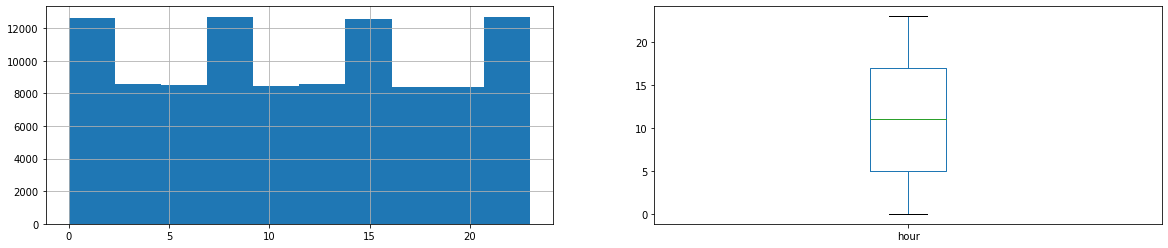

In [8]:
fig, axs = plt.subplots(1,2, figsize=(20, 4))

df['hour'].hist(ax=axs[0])
df['hour'].plot(kind='box', ax=axs[1])

stat, p = scipy.stats.shapiro(df['hour']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Тест Шапиро: Принять гипотезу о нормальности')
else:
    print('Тест Шапиро: Отклонить гипотезу о нормальности')
    
stat, p = scipy.stats.normaltest(df['hour']) # Критерий согласия Пирсона
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('критерий Пирсона: Принять гипотезу о нормальности')
else:
    print('критерий Пирсона: Отклонить гипотезу о нормальности')

Заказ сделан

C:\Users\trufanovdv\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=0.553, p-value=0.000
Тест Шапиро: Отклонить гипотезу о нормальности
Statistics=27470.722, p-value=0.000
критерий Пирсона: Отклонить гипотезу о нормальности


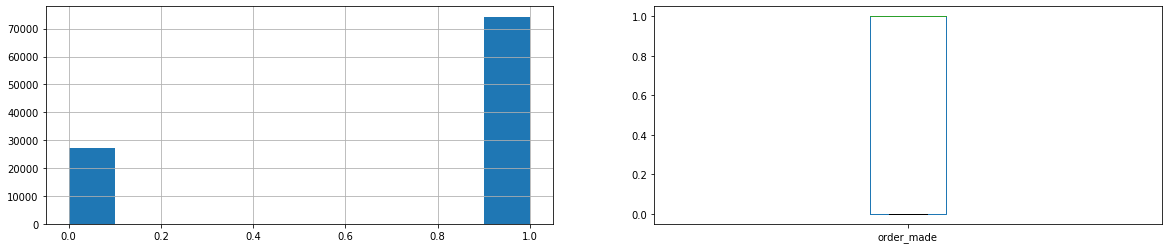

In [9]:
fig, axs = plt.subplots(1,2, figsize=(20, 4))

df['order_made'].hist(ax=axs[0])
df['order_made'].plot(kind='box', ax=axs[1])

stat, p = scipy.stats.shapiro(df['order_made']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Тест Шапиро: Принять гипотезу о нормальности')
else:
    print('Тест Шапиро: Отклонить гипотезу о нормальности')
    
stat, p = scipy.stats.normaltest(df['order_made']) # Критерий согласия Пирсона
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('критерий Пирсона: Принять гипотезу о нормальности')
else:
    print('критерий Пирсона: Отклонить гипотезу о нормальности')

**Для АБ тестов, задействующих конверсии, рассчитайте необходимые размеры выборок**

In [ ]:
# https://www.evanmiller.org/ab-testing/sample-size.html - тест

In [10]:
#конверсия заказов
df['order_made'].sum() / df['order_made'].count()

0.7313891625615764

In [ ]:
Гипотеза:
если в приложение добавить информацию о пробках, то количество входов в приложение возрастет, что приведет к росту количества заказов.
базисная конверсия заказов 73%
ожидаем рост на 5%
доверительный интервал - 95%
размер выборки - 1700

In [11]:
df_econom = df[df['order_class'] == 'economy']
df_econom['order_made'].sum() / df_econom['order_made'].count()

0.7385162752281921

In [ ]:
Гипотеза:
если при открытии приложения сообщать о действующих акциях, то количество заказов возрастет в эконом сегменте
базисная конверсия заказов 73.85%
ожидаем рост на 20%
доверительный интервал - 95%
размер выборки - 67

In [12]:
df_android = df[df['os'] == 'Android']
df_android['order_made'].sum() / df_android['order_made'].count()

0.6843692676732045

In [ ]:
Гипотеза:
клиенты с телефонами Android чаще не делают заказ после расчета стоимости поездки. Скорее всего сравнивают цены конкурентов. Если для Android делать скидку, то количество заказов увеличится для всех классов
базисная конверсия заказов 68.4%
ожидаем рост на 10%
доверительный интервал - 95%
размер выборки - 440

In [24]:
df_surge = df[ (df['order_class'].isin(['economy', 'business'])) & (df_surge['surge'] == 'surge') ]
1 - df_surge['order_made'].sum() / df_surge['order_made'].count()

0.27134755603564675

In [ ]:
Гипотеза:
если отменить надбавку к стоимости поездки во время повышенного спроса, то количество отказов сократится в эконом и бизнес классе
базисная конверсия отказов 27.13%
ожидаем сокращение на 10%
доверительный интервал - 95%
размер выборки - 3400